# ATO Community Quantitative Analysis - Comparison

### Import packages

In [1]:
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# for plotting purposes
%matplotlib inline

### Import custom functions

In [2]:
import loop11_functions as beta
%run loop11_functions.py

### Import cleaned data

In [3]:
clean_df = pd.read_csv('ato-community_full_clean.csv')
clean_df.head()

,Participant No.,CustomID,IP Address,Date Started,Date Completed,User Agent,Total Time Spent,Avg Time Taken,Avg Page Views,Task. How to use this panel - Completion,...,"* ""I would consider ATO Community a reliable source of information.""",* How would you expect to hear about ATO Community?,"* How would you expect to hear about ATO Community? - Other, please specify","* ""I would contact the ATO after using ATO Community to make sure the information I found is correct.""",* What three words describe your experience today with ATO Community?,Do you have any suggestions on how we can improve ATO Community?,* Which of the following best describes your role? (Select all that apply),"* Which of the following best describes your role? - Other, please specify",* Are you an ATO employee?,Which age group do you belong to?
0,Participant 48,NaN,203.173.10.21,05/25/17 11:40,05/25/17 11:44,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:53.0) G...,223,20.5,1.5,success,...,Neither agree no disagree,"ATO Social media, Email from ATO, Television, ...",NaN,Strongly agree,"informative, precise and clear",NaN,Small business,NaN,No,Older than 65
1,Participant 51,NaN,120.147.129.202,05/25/17 12:17,05/25/17 12:25,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,489,54.5,1.5,success,...,Neither agree no disagree,Email from ATO,NaN,Agree,Not necessarily reliable,NaN,Tax professional,NaN,No,Older than 65
2,Participant 53,NaN,203.55.28.231,05/25/17 12:23,05/25/17 12:29,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:49.0) G...,351,39.0,1.5,success,...,Agree,"ATO Social media, Email from ATO, ATO website",NaN,Agree,"nice, good, thanks","Looks nice, I like how its setup right now, ve...",Individual,NaN,No,26-35
3,Participant 54,NaN,202.20.30.89,05/25/17 12:27,05/25/17 12:31,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,254,52.5,2.0,success,...,Neither agree no disagree,"ATO website, Small Business Newsroom",NaN,Neither agree nor disagree,Looks good,NaN,Small business,NaN,No,46-65
4,Participant 55,NaN,150.101.255.43,05/25/17 12:30,05/25/17 12:35,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,265,54.0,1.5,success,...,Agree,ATO website,NaN,Disagree,Easy to use,NaN,Tax professional,NaN,No,46-65


In [4]:
N = len(clean_df)
N

196

In [5]:
# Delare variable to store folder file location
folder = "Graphs/comparison_graphs/"

In [6]:
# Scale variables
likert_scale = {'Strongly agree': 5, 'Agree': 4, 'Neither agree nor disagree': 3, 'Disagree': 2, 'Strongly disagree': 1, 'NaN': 3}
task_scale = {'success': 1, 'fail': 2, 'abandon': 3, 'NaN': 3}

# Likert scale for reliability question (typo in the neither heading)
likert_scale_2 = {'Strongly agree': 5, 'Agree': 4, 'Neither agree no disagree': 3, 'Disagree': 2, 'Strongly disagree': 1, 'NaN': 3}


In [7]:
list(clean_df.columns.values) # For reference later when picking out data in specific column

['Participant No.',
 'CustomID',
 'IP Address',
 'Date Started',
 'Date Completed',
 'User Agent',
 'Total Time Spent',
 'Avg Time Taken',
 'Avg Page Views',
 'Task. How to use this panel - Completion',
 'Task. How to use this panel - Page Views',
 'Task. How to use this panel - Time Spent',
 'Task 1 - ATO-certified answer - Completion',
 'Task 1 - ATO-certified answer - Page Views',
 'Task 1 - ATO-certified answer - Time Spent',
 '* How regularly do you use online forums?',
 '* How would you know if an answer is the official response?',
 '* "I found it easy to find information to complete the task."',
 '* "I would trust an \'ATO certified\' answer."',
 '* "I would trust an answer from an ATO Community member."',
 '* How likely are you to use ATO Community in the future? (1 = least likely, 10 = most likely)',
 '* How likely are you to recommend ATO Community to others? (1 = least likely, 10 = most likely)',
 '* "I would consider ATO Community a reliable source of information."',
 '* Ho

## Correlation functions

In [16]:
# Function to correlate task vs likert.

# Parameters :
#      df - dataframe, e.g. clean_df
#      task - string, name of the column in the dataframe with the task data
#      question - string, name of the column in the dataframe with the likert question data
#      likert_scale - dict, the likert scale used and the numerical data conversion. eg. {'Strongly agree':5}
#      task_scale - dict, the task scale and the numerical data conversion. eg. {'success':1}

def correlation_task_VS_likert(df, task, question, task_scale, question_scale):
    results_numerical = []
    
    # Convert likert responses to numerical data.
    # 1 = SD, 2 = D, 3 = N A/D, 4 = A, 5 = SA
    results_numerical.append(pd.DataFrame(df[question].replace(question_scale, regex=True)))
    
    # Convert task data to numerical data.
    # 1 = success, 2 = fail, 3 = abandon
    results_numerical.append(pd.DataFrame(df[task].replace(task_scale, regex=True)))
    
    # convert the flat list into dataframe columns 
    results_numerical = pd.concat(results_numerical, axis=1)    
    
    #display(results_numerical.head())
    display(results_numerical.corr(method='pearson'))
    
    #plt.scatter(results_numerical[task], results_numerical[question])
    sns.lmplot(x=task, y=question, data=results_numerical, fit_reg=True)

In [17]:
# Function to correlate task vs numerical.

# Parameters :
#      df - dataframe, e.g. clean_df
#      task - string, name of the column in the dataframe with the task data
#      question - string, name of the column in the dataframe with the likert question data
#      likert_scale - dict, the likert scale used and the numerical data conversion. eg. {'Strongly agree':5}
#      task_scale - dict, the task scale and the numerical data conversion. eg. {'success':1}

def correlation_task_VS_numerical(df, task, question, task_scale):
    results_numerical = []
    
    results_numerical.append(pd.DataFrame(df[question]))
    
    # Convert task data to numerical data.
    # 1 = success, 2 = fail, 3 = abandon
    results_numerical.append(pd.DataFrame(df[task].replace(task_scale, regex=True)))
    
    # convert the flat list into dataframe columns 
    results_numerical = pd.concat(results_numerical, axis=1)    
    
    #display(results_numerical.head())
    display(results_numerical.corr(method='pearson'))
    
    #plt.scatter(results_numerical[task], results_numerical[question])
    sns.lmplot(x=task, y=question, data=results_numerical, fit_reg=True)

In [18]:
# Function to correlate two numerical questions.

# Parameters :
#      df - dataframe, e.g. clean_df
#      task - string, name of the column in the dataframe with the task data
#      question - string, name of the column in the dataframe with the likert question data
#      likert_scale - dict, the likert scale used and the numerical data conversion. eg. {'Strongly agree':5}
#      task_scale - dict, the task scale and the numerical data conversion. eg. {'success':1}

def correlation_numerical_VS_numerical(df, question, question_2):
    results_numerical = []
    
    results_numerical.append(pd.DataFrame(df[question]))
    results_numerical.append(pd.DataFrame(df[question_2]))
    
    # convert the flat list into dataframe columns 
    results_numerical = pd.concat(results_numerical, axis=1)    
    
    #display(results_numerical.head())
    display(results_numerical.corr(method='pearson'))
    
    #plt.scatter(results_numerical[task], results_numerical[question])
    sns.lmplot(x=question, y=question_2, data=results_numerical, fit_reg=True)

## Compare task to questions

,* How regularly do you use online forums?,Task 1 - ATO-certified answer - Completion
* How regularly do you use online forums?,1.000000,0.138887
Task 1 - ATO-certified answer - Completion,0.138887,1.000000


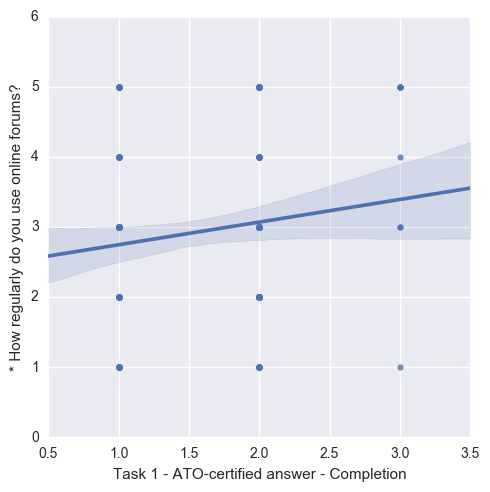

In [20]:
frequency_scale = {'Daily':1, 'Weekly':2, 'Monthly':3, 'Yearly':4, 'Never':5}
correlation_task_VS_likert(clean_df, 'Task 1 - ATO-certified answer - Completion', '* How regularly do you use online forums?', task_scale, frequency_scale)

###  Task 1 - ATO-certified answer VS I found it easy to find information to complete the task.

,"* ""I found it easy to find information to complete the task.""",Task 1 - ATO-certified answer - Completion
"* ""I found it easy to find information to complete the task.""",1.00000,-0.42106
Task 1 - ATO-certified answer - Completion,-0.42106,1.00000


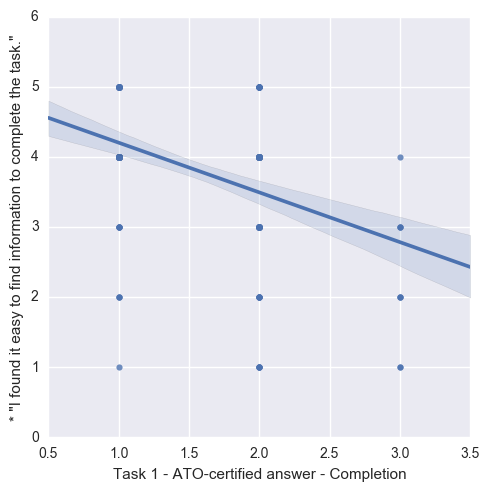

In [22]:
correlation_task_VS_likert(clean_df, 'Task 1 - ATO-certified answer - Completion',
                       '* "I found it easy to find information to complete the task."', task_scale, likert_scale)

### Task 1 VS I would trust an ATO certified answer

,"* ""I would trust an 'ATO certified' answer.""",Task 1 - ATO-certified answer - Completion
"* ""I would trust an 'ATO certified' answer.""",1.000000,-0.113087
Task 1 - ATO-certified answer - Completion,-0.113087,1.000000


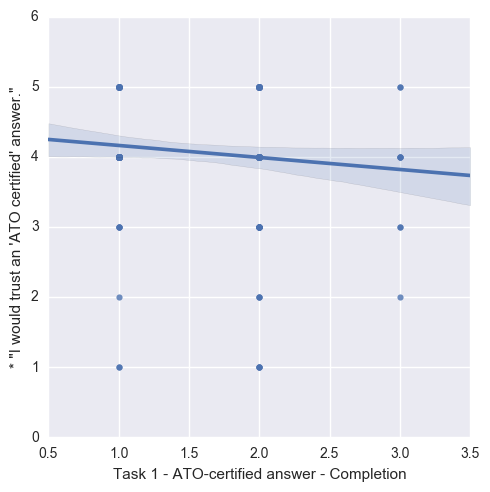

In [23]:
correlation_task_VS_likert(clean_df, 'Task 1 - ATO-certified answer - Completion',
                       '* "I would trust an \'ATO certified\' answer."', task_scale, likert_scale)

### Task 1 - ATO-certified answer VS I would trust an answer from an ATO Community member

,"* ""I would trust an answer from an ATO Community member.""",Task 1 - ATO-certified answer - Completion
"* ""I would trust an answer from an ATO Community member.""",1.000000,-0.039019
Task 1 - ATO-certified answer - Completion,-0.039019,1.000000


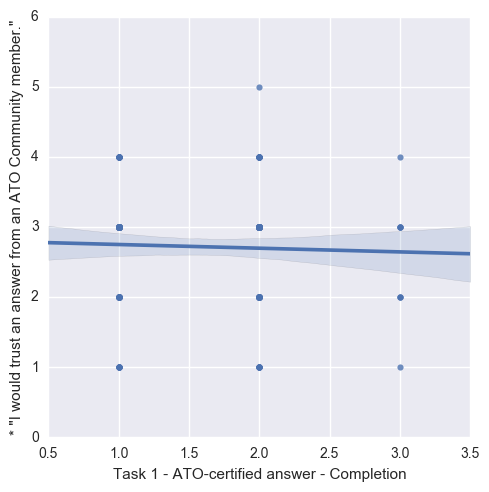

In [24]:
correlation_task_VS_likert(clean_df, 'Task 1 - ATO-certified answer - Completion',
                       '* "I would trust an answer from an ATO Community member."', task_scale, likert_scale)

### Task 1 - ATO-certified answer VS I would consider ATO Community a reliable source of information

,"* ""I would consider ATO Community a reliable source of information.""",Task 1 - ATO-certified answer - Completion
"* ""I would consider ATO Community a reliable source of information.""",1.000000,-0.225893
Task 1 - ATO-certified answer - Completion,-0.225893,1.000000


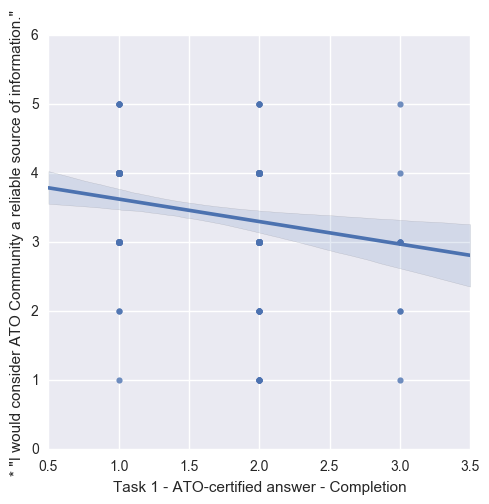

In [25]:
correlation_task_VS_likert(clean_df, 'Task 1 - ATO-certified answer - Completion',
                      '* "I would consider ATO Community a reliable source of information."', task_scale, likert_scale_2)

### Task 1 - ATO-certified answer VS I would contact the ATO after using ATO Community to make sure the information I found is correct

,"* ""I would contact the ATO after using ATO Community to make sure the information I found is correct.""",Task 1 - ATO-certified answer - Completion
"* ""I would contact the ATO after using ATO Community to make sure the information I found is correct.""",1.000000,0.339665
Task 1 - ATO-certified answer - Completion,0.339665,1.000000


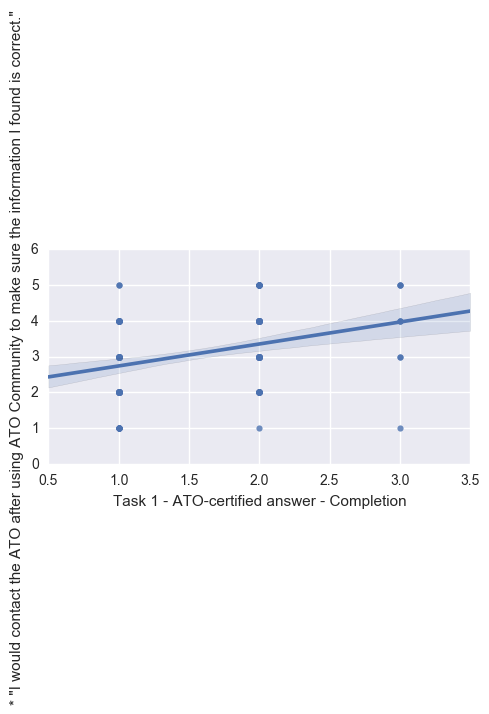

In [26]:
correlation_task_VS_likert(clean_df, 'Task 1 - ATO-certified answer - Completion',
                      '* "I would contact the ATO after using ATO Community to make sure the information I found is correct."', task_scale, likert_scale)

### Task 1 - ATO-certified answer VS How likely are you to use ATO Community in the future?

,"* How likely are you to use ATO Community in the future? (1 = least likely, 10 = most likely)",Task 1 - ATO-certified answer - Completion
"* How likely are you to use ATO Community in the future? (1 = least likely, 10 = most likely)",1.000000,-0.092676
Task 1 - ATO-certified answer - Completion,-0.092676,1.000000


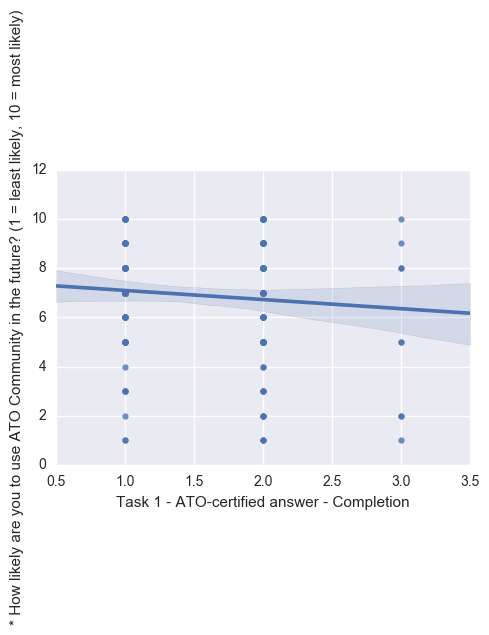

In [27]:
correlation_task_VS_numerical(clean_df, 'Task 1 - ATO-certified answer - Completion',
                       '* How likely are you to use ATO Community in the future? (1 = least likely, 10 = most likely)', task_scale)

### Task 1 - ATO-certified answer VS How likely are you to recommend ATO Community to others?

,"* How likely are you to recommend ATO Community to others? (1 = least likely, 10 = most likely)",Task 1 - ATO-certified answer - Completion
"* How likely are you to recommend ATO Community to others? (1 = least likely, 10 = most likely)",1.000000,-0.121107
Task 1 - ATO-certified answer - Completion,-0.121107,1.000000


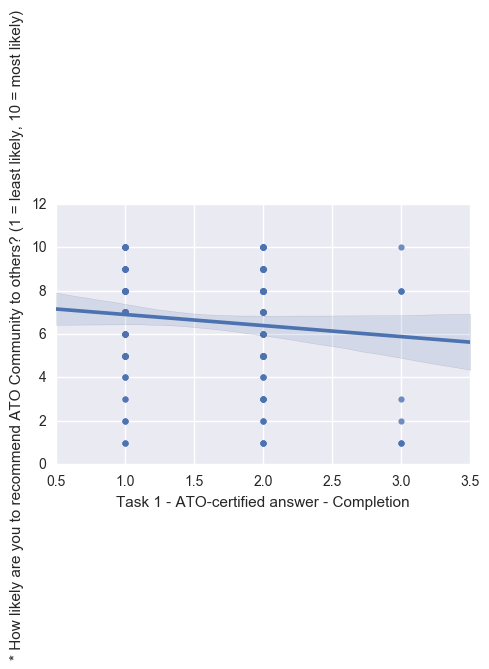

In [28]:
correlation_task_VS_numerical(clean_df, 'Task 1 - ATO-certified answer - Completion',
                       '* How likely are you to recommend ATO Community to others? (1 = least likely, 10 = most likely)', task_scale)

### Correlation: Likely to use vs likely to recommend

,"* How likely are you to use ATO Community in the future? (1 = least likely, 10 = most likely)","* How likely are you to recommend ATO Community to others? (1 = least likely, 10 = most likely)"
"* How likely are you to use ATO Community in the future? (1 = least likely, 10 = most likely)",1.00000,0.84031
"* How likely are you to recommend ATO Community to others? (1 = least likely, 10 = most likely)",0.84031,1.00000


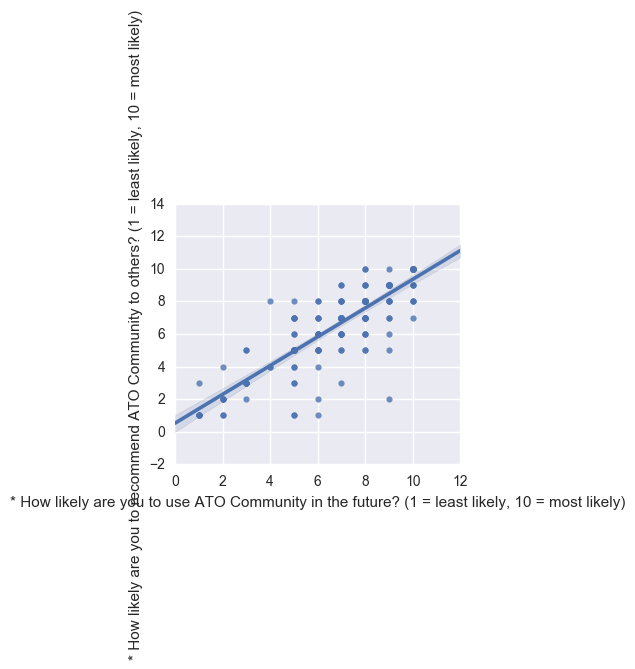

In [30]:
correlation_numerical_VS_numerical(clean_df, '* How likely are you to use ATO Community in the future? (1 = least likely, 10 = most likely)', '* How likely are you to recommend ATO Community to others? (1 = least likely, 10 = most likely)')

### I would trust an \'ATO certified\' answer VS I would trust an answer from an ATO Community member


,"* ""I would trust an answer from an ATO Community member.""","* ""I would trust an 'ATO certified' answer."""
"* ""I would trust an answer from an ATO Community member.""",1.00000,0.18997
"* ""I would trust an 'ATO certified' answer.""",0.18997,1.00000


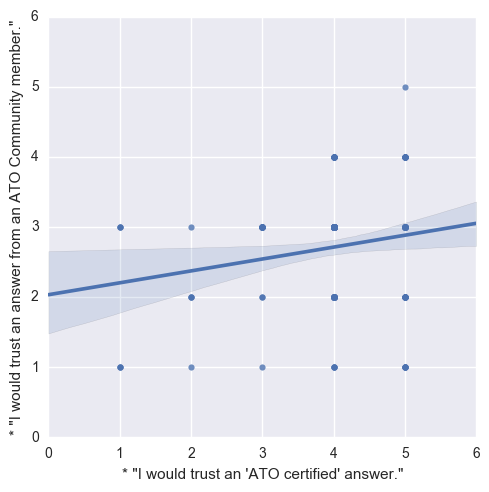

In [31]:
correlation_task_VS_likert(clean_df, '* "I would trust an \'ATO certified\' answer."', \
                           '* "I would trust an answer from an ATO Community member."', likert_scale, likert_scale)